# Explore Zillow

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# custom imports
import wrangle_zillow as w

plt.rcParams['figure.figsize'] = (12, 7)

In [2]:
# get data
df = w.get_zillow_data()

In [3]:
df.shape

(77381, 69)

In [4]:
# clean data
df = w.clean_zillow(df)

In [5]:
df.shape

(41062, 18)

In [6]:
# split data before exploration
train, val, test = w.split(df)

In [7]:
train.shape, val.shape, test.shape

((32889, 18), (4066, 18), (4107, 18))

In [8]:
# verify correct proportions
round(train.shape[0] / df.shape[0],2), round(val.shape[0] / df.shape[0],2), round(test.shape[0] / df.shape[0],2)

(0.8, 0.1, 0.1)

In [9]:
# reassign to make exploration easier in this notebook
train = df

In [10]:
df.head().T

,0,2,7,10,15
sale_date,2017-01-01,2017-01-01,2017-01-01,2017-01-02,2017-01-02
bath_cnt,3.5,2.0,1.0,3.0,2.5
bed_cnt,4,3,2,4,3
sqft,3100,1243,738,2540,1371
latitude,33634931,33886168,34149214,34434971,34238229
longitude,-117869207,-117823170,-118239357,-118464390,-119170633
lot_sqft,4506,8432,4214,10384,3445
land_use_code,122,122,0100,0101,1111
zoning_desc,LAR1,LAR1,GLR4YY,SCUR2,LAR1
total_rooms,8,6,3,8,6


## 1. & 2.

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

**What is distribution of each variable?**

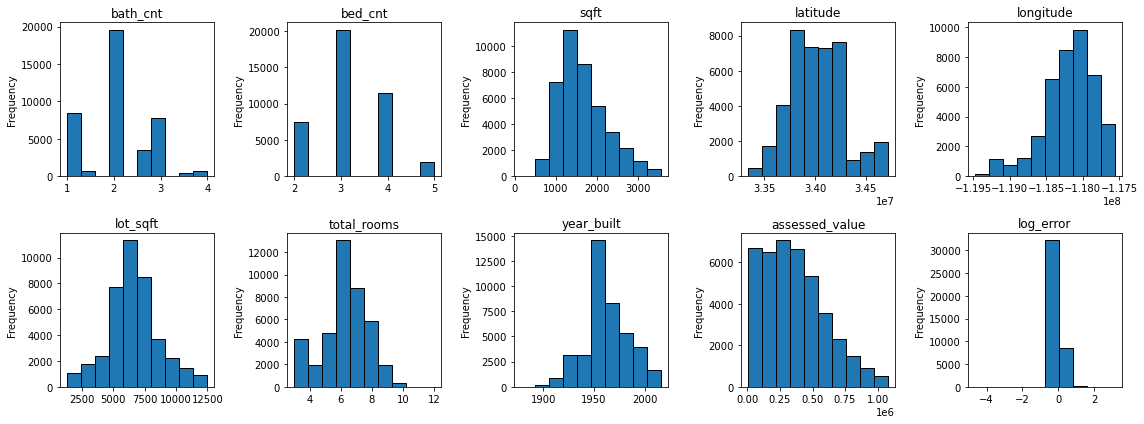

In [11]:
fig, axs = plt.subplots(2, 5, sharey=False, figsize=(16, 6))
axe = axs.ravel()
for i, c in enumerate(df.select_dtypes('number').columns):
    df[c].plot.hist(ax=axe[i],title=c, ec='black')
    plt.tight_layout()

**Takeways:**
- Distributions aren't perfectly normal, but might be normal enough

***My questions:***
1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

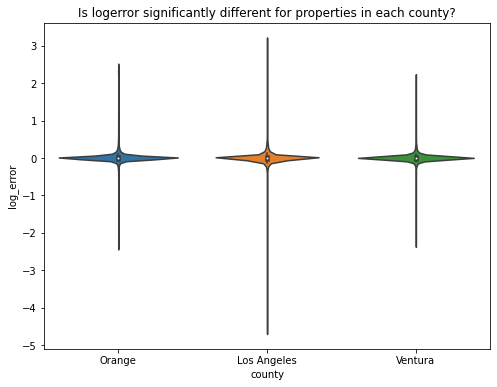

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df.county, y=df.log_error)
plt.title('Is logerror significantly different for properties in each county?');

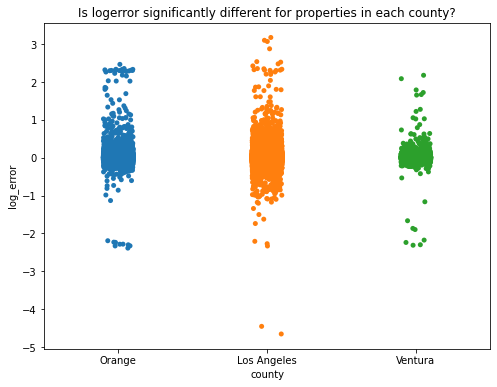

In [13]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=df.county, y=df.log_error)
plt.title('Is logerror significantly different for properties in each county?');

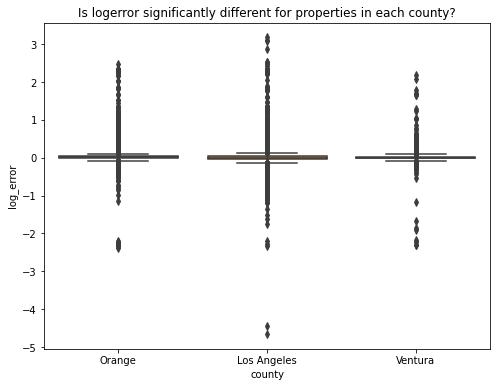

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.county, y=df.log_error)
plt.title('Is logerror significantly different for properties in each county?');

In [15]:
df.county.value_counts(normalize=True)

Los Angeles    0.648531
Orange         0.269495
Ventura        0.081974
Name: county, dtype: float64

In [16]:
print(df.log_error[df.county == 'Los Angeles'].mean())
print(df.log_error[df.county == 'Orange'].mean())
print(df.log_error[df.county == 'Ventura'].mean())
print(df.log_error.mean())

0.014007786850391618
0.022523332169799282
0.011993473881009884
0.01613756248357136


$H_0$: The mean logerror values for each county are not different than the overall logerror mean for the whole population

$H_a$: The mean logerror values for each county are different than the overall logerror mean for the whole population

In [17]:
# run one sample, two-tailed t-test for each county
stats.ttest_1samp(a=df.log_error[df.county == 'Los Angeles'], popmean=df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-2.195461586989166, pvalue=0.028139100218857457)

In [18]:
stats.ttest_1samp(a=df.log_error[df.county == 'Orange'], popmean=df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=3.9488976554315993, pvalue=7.899847849707512e-05)

In [19]:
stats.ttest_1samp(a=df.log_error[df.county == 'Ventura'], popmean=df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-1.5624834027638164, pvalue=0.11826818697463144)

***Conclusions:***
- For Los Angelese and Ventura Counties, *we fail to reject* the null
- For Orange County, we reject the null

2. Is sqft related to log error?
    - bin by sqft?

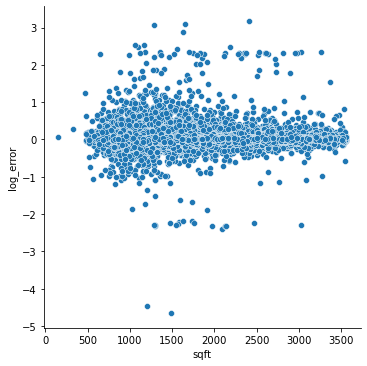

In [20]:
sns.relplot(x=df.sqft, y=df.log_error);

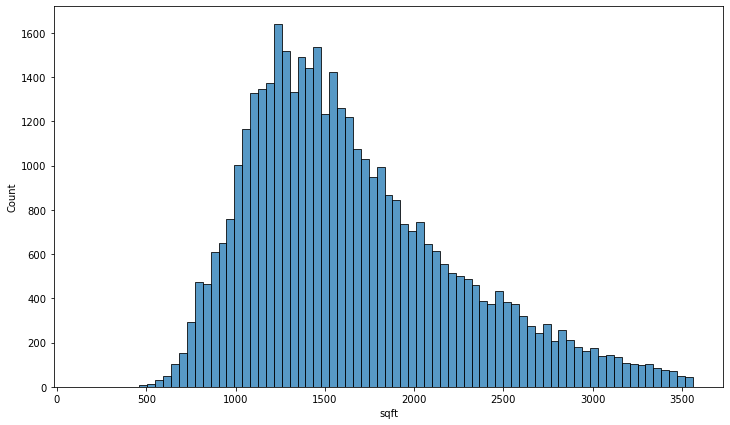

In [21]:
sns.histplot(x=df.sqft);

In [22]:
df['sqft_bins'] = pd.cut(df.sqft, [0, 1500, 2500, 4000])

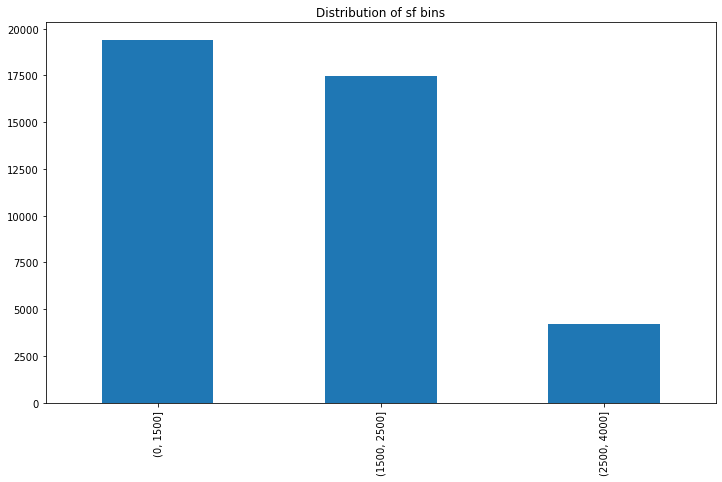

In [23]:
df.sqft_bins.value_counts().plot.bar(title='Distribution of sf bins');

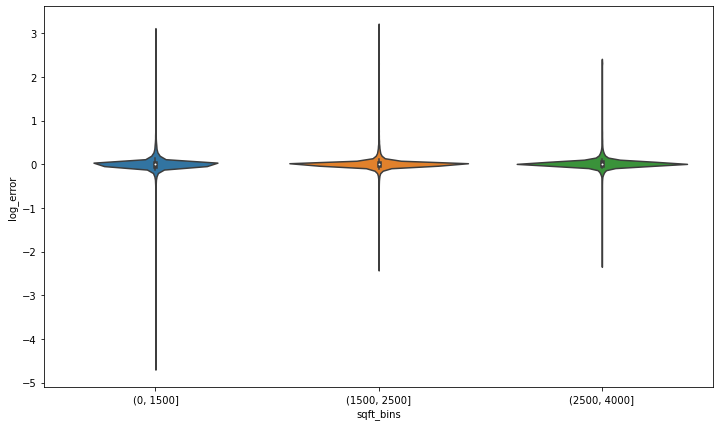

In [24]:
sns.violinplot(y=df.log_error, x=df.sqft_bins);

In [25]:
df.sqft_bins.value_counts()

(0, 1500]       19369
(1500, 2500]    17479
(2500, 4000]     4214
Name: sqft_bins, dtype: int64

In [26]:
print(df.log_error[df.sqft <= 1500].mean())
print(df.log_error[(df.sqft > 1500) & (df.sqft <= 2500 )].mean())
print(df.log_error[df.sqft > 2500].mean())

0.014438594018222351
0.0155552353724155
0.026362008563598792


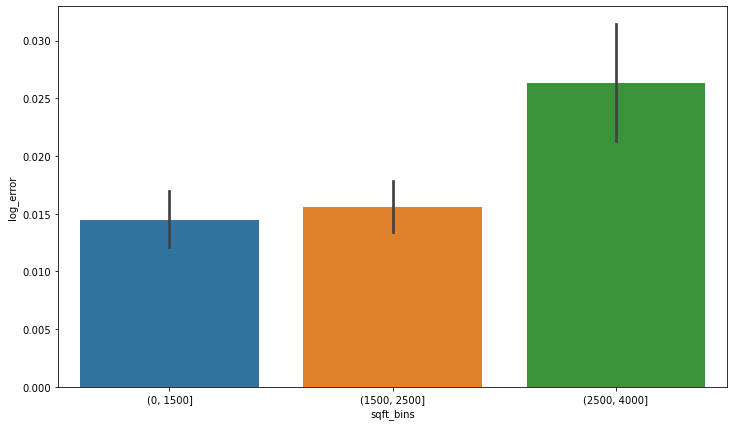

In [27]:
sns.barplot(x=df.sqft_bins, y=df.log_error);

In [28]:
# two sample t test for each combo
stats.ttest_ind(df.log_error[df.sqft <= 1500], df.log_error[(df.sqft > 1500) & (df.sqft <= 2500)], alternative='two-sided')

Ttest_indResult(statistic=-0.6691086891119712, pvalue=0.503430339811392)

In [29]:
stats.ttest_ind(df.log_error[df.sqft <= 1500], df.log_error[df.sqft > 2500], alternative='two-sided')

Ttest_indResult(statistic=-4.159087337759244, pvalue=3.206516818243703e-05)

In [30]:
stats.ttest_ind(df.log_error[(df.sqft > 1500) & (df.sqft <= 2500 )], df.log_error[df.sqft > 2500], alternative='two-sided')

Ttest_indResult(statistic=-4.062884549349765, pvalue=4.864051149366574e-05)

***Conclusion:***
- No differece of mean log error between 0 - 1500 and 1500 - 2500
- Different mean log error between 0 - 1500 and 2500+
- Different mean log error between 1500 - 2500 and 2500+
**Error is significantly higher for properties over 2500 sqft**

In [31]:
# one sample t test for each group
stats.ttest_1samp(df.log_error[df.sqft <= 1500], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-1.407926118649571, pvalue=0.159168998094202)

In [32]:
stats.ttest_1samp(df.log_error[(df.sqft > 1500) & (df.sqft <= 2500 )], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-0.5111078798619905, pvalue=0.6092819745879003)

In [33]:
stats.ttest_1samp(df.log_error[df.sqft > 2500], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=3.860982216236816, pvalue=0.0001146255508695949)

***Conclusion:***
- Mean log error for all 0-1500 and 1500-2500 is not different from pop mean
- Mean log error for 2500+ is different from pop mean
**Error is significantly higher for properties over 2500 sqft**

3. Is appraised value related to log error?

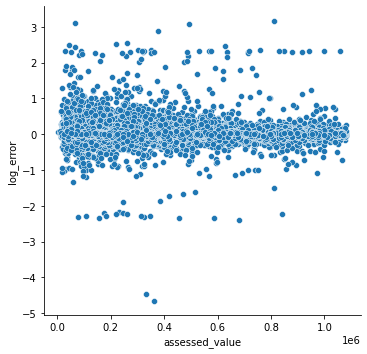

In [34]:
sns.relplot(x=df.assessed_value, y=df.log_error);

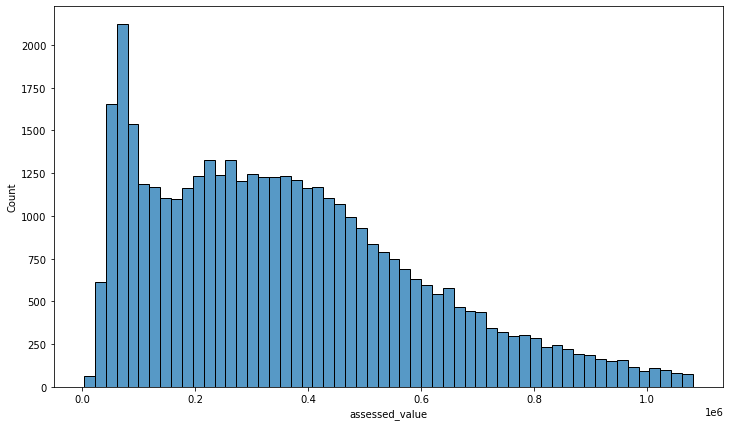

In [35]:
sns.histplot(x=df.assessed_value);

In [36]:
df['assessed_value_bins'] = pd.cut(df.assessed_value, [0, 250_000, 500_000, 1_500_000])

In [37]:
df.assessed_value_bins.value_counts()

(0, 250000]          15312
(250000, 500000]     15151
(500000, 1500000]    10599
Name: assessed_value_bins, dtype: int64

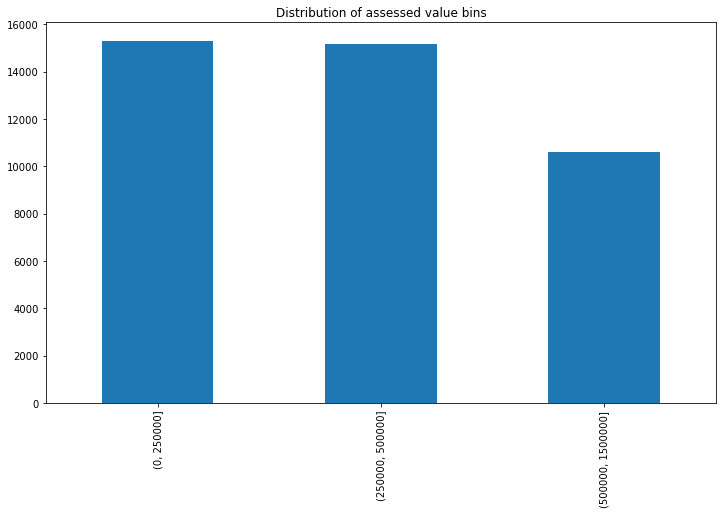

In [38]:
df.assessed_value_bins.value_counts().plot.bar(title='Distribution of assessed value bins');

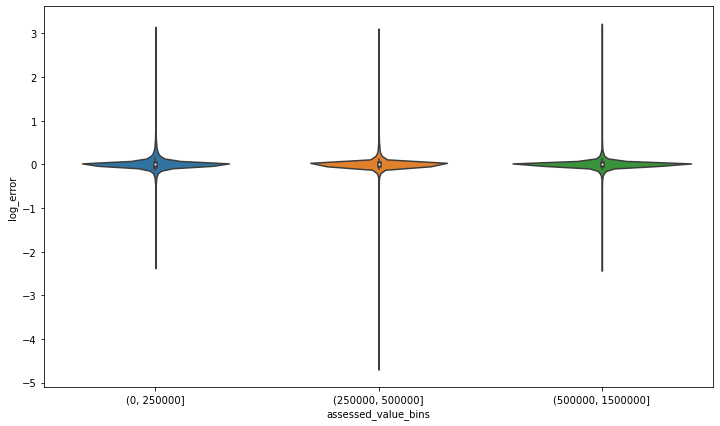

In [39]:
sns.violinplot(y=df.log_error, x=df.assessed_value_bins);

In [40]:
print(df.log_error[df.assessed_value <= 250_000].mean())
print(df.log_error[(df.assessed_value > 250_000) & (df.assessed_value <= 500_000 )].mean())
print(df.log_error[df.assessed_value > 500_000].mean())

0.021100226665706795
0.01390953673310035
0.012153083210859452


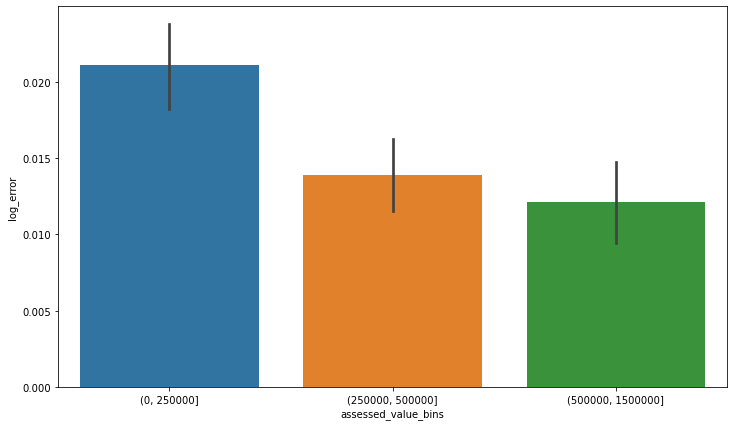

In [41]:
sns.barplot(x=df.assessed_value_bins, y=df.log_error);

In [42]:
# two sample t test for each combo
stats.ttest_ind(df.log_error[df.assessed_value <= 250_000], df.log_error[(df.assessed_value > 250_000) & (df.assessed_value <= 500_000 )], alternative='two-sided')

Ttest_indResult(statistic=3.836840813802536, pvalue=0.00012487850285936434)

In [43]:
stats.ttest_ind(df.log_error[df.assessed_value <= 250_000], df.log_error[df.assessed_value > 500_000], alternative='two-sided')

Ttest_indResult(statistic=4.292245184889415, pvalue=1.775173397160384e-05)

In [44]:
stats.ttest_ind(df.log_error[(df.assessed_value > 250_000) & (df.assessed_value <= 500_000 )], df.log_error[df.assessed_value > 500_000], alternative='two-sided')

Ttest_indResult(statistic=0.8978437229482584, pvalue=0.3692772662592875)

***Conclusion:***
- No differece of mean log error between 250k - 500k and 500k+
- Different mean log error between 0 - 250k and 250k - 500k
- Different mean log error between 10 - 250k and 500k+
**Error is significantly higher for properties under 250k**

In [45]:
# one sample t test for each group
stats.ttest_1samp(df.log_error[df.assessed_value <= 250_000], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=3.571378794474662, pvalue=0.0003561956509033242)

In [46]:
stats.ttest_1samp(df.log_error[(df.assessed_value > 250_000) & (df.assessed_value <= 500_000 )], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-1.773930439629335, pvalue=0.07609473850064273)

In [47]:
stats.ttest_1samp(df.log_error[df.assessed_value > 500_000], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-2.6579007954193177, pvalue=0.007874703612844565)

***Conclusion:***
- Mean log error for 0-250k and 500k+ is different from pop mean
- Mean log error for 250k - 500k is different from pop mean
**Error is significantly higher for properties on both ends of dist**

4. Is year built related to log error?

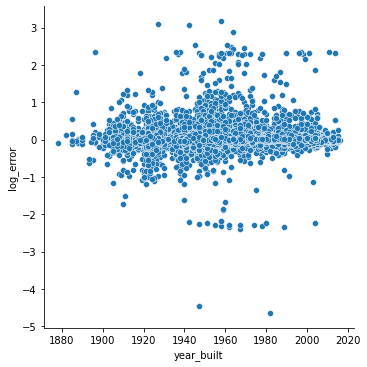

In [48]:
sns.relplot(x=df.year_built, y=df.log_error);

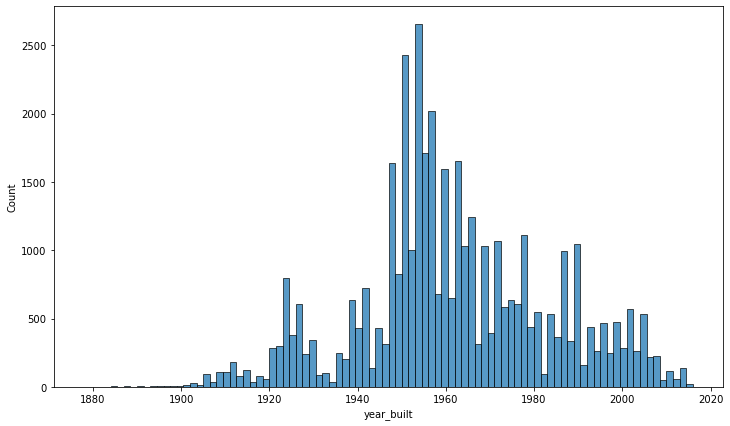

In [49]:
sns.histplot(x=df.year_built);

In [50]:
df['year_built_bins'] = pd.cut(df.year_built, [0, 1950, 1970, 2020])

In [51]:
df.year_built_bins.value_counts()

(1950, 1970]    16969
(1970, 2020]    12891
(0, 1950]       11202
Name: year_built_bins, dtype: int64

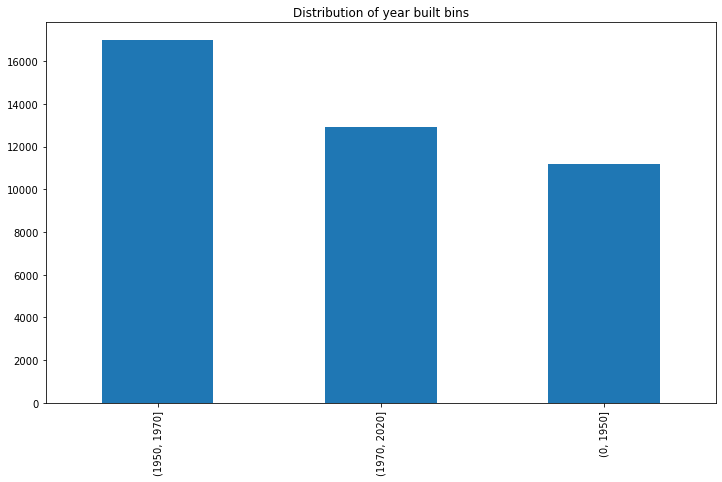

In [52]:
df.year_built_bins.value_counts().plot.bar(title='Distribution of year built bins');

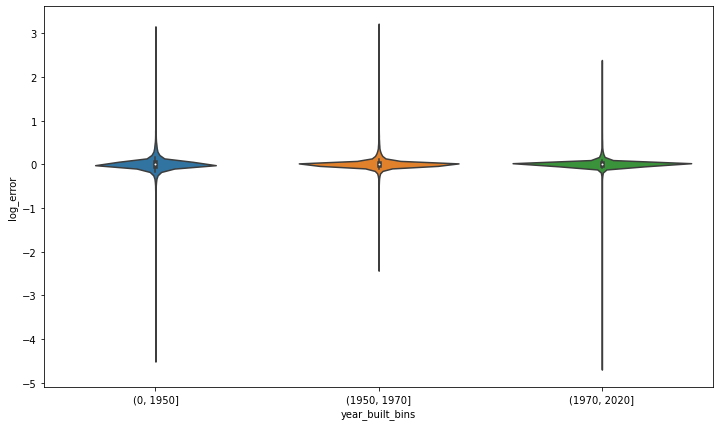

In [53]:
sns.violinplot(y=df.log_error, x=df.year_built_bins);

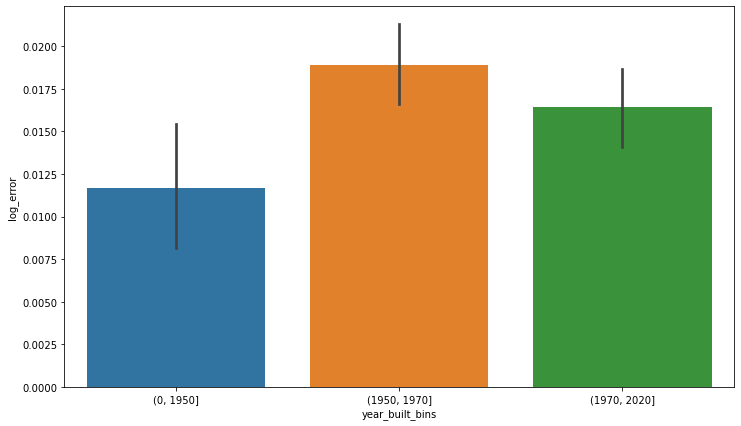

In [54]:
sns.barplot(x=df.year_built_bins, y=df.log_error);

In [55]:
# two sample t test for each combo
stats.ttest_ind(df.log_error[df.year_built <= 1950], df.log_error[(df.year_built > 1950) & (df.year_built <= 1970 )], alternative='two-sided')

Ttest_indResult(statistic=-3.4533678077541072, pvalue=0.0005544470864893978)

In [56]:
stats.ttest_ind(df.log_error[df.year_built <= 1950], df.log_error[df.year_built > 1970], alternative='two-sided')

Ttest_indResult(statistic=-2.2553659871538305, pvalue=0.024119300698202714)

In [57]:
stats.ttest_ind(df.log_error[(df.year_built > 1950) & (df.year_built <= 1970 )], df.log_error[df.year_built > 1970], alternative='two-sided')

Ttest_indResult(statistic=1.4072500747530878, pvalue=0.15936365724275373)

***Conclusion:***
- No differece of mean log error between 1950 - 1970 and 1970+
- Different mean log error between 0 - 1950 and 1950 - 1970
- Different mean log error between 0 - 1950 and 1970+

In [58]:
# one sample t test for each group
stats.ttest_1samp(df.log_error[df.year_built <= 1950], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-2.496272599535884, pvalue=0.012564870539964823)

In [59]:
stats.ttest_1samp(df.log_error[(df.year_built > 1950) & (df.year_built <= 1970 )], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=2.2511700404173753, pvalue=0.024387512521375276)

In [60]:
stats.ttest_1samp(df.log_error[df.year_built > 1970], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=0.23622280288189523, pvalue=0.8132635392804096)

***Conclusion:***
- Mean log error for 0-1950 and 1950 - 1970 is different from pop mean
- Mean log error for 1970+ is not different from pop mean

5. Is total rooms related to log error?

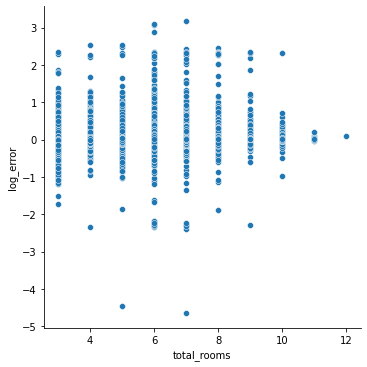

In [61]:
sns.relplot(x=df.total_rooms, y=df.log_error);

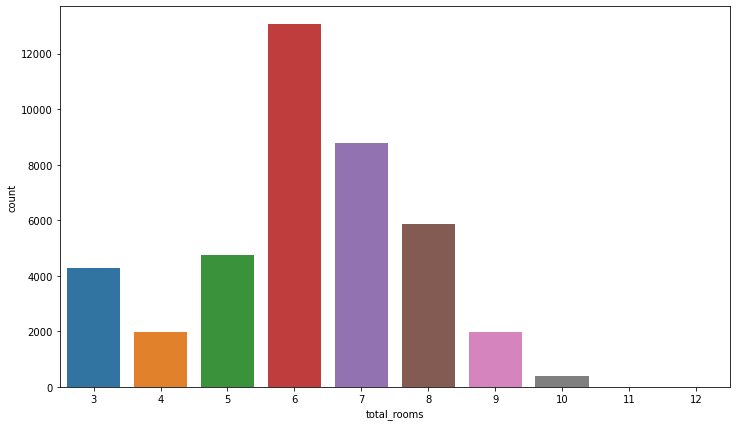

In [62]:
sns.countplot(x=df.total_rooms);

In [63]:
df['total_room_bins'] = pd.cut(df.total_rooms, [0, 5, 7, 12])

In [64]:
df.total_room_bins.value_counts()

(5, 7]     21817
(0, 5]     11020
(7, 12]     8225
Name: total_room_bins, dtype: int64

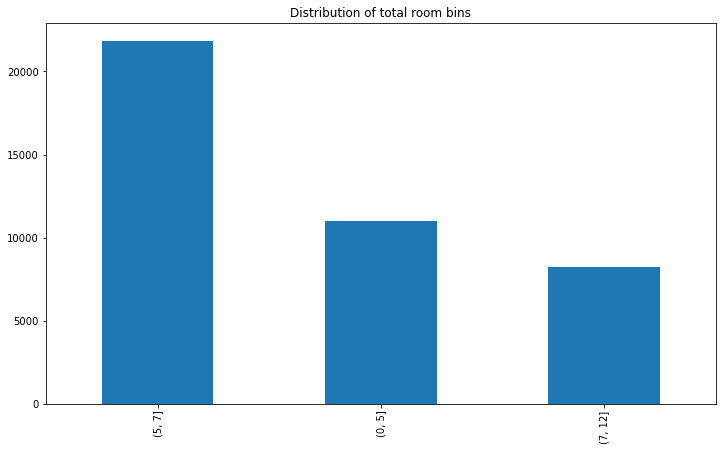

In [65]:
df.total_room_bins.value_counts().plot.bar(title='Distribution of total room bins');

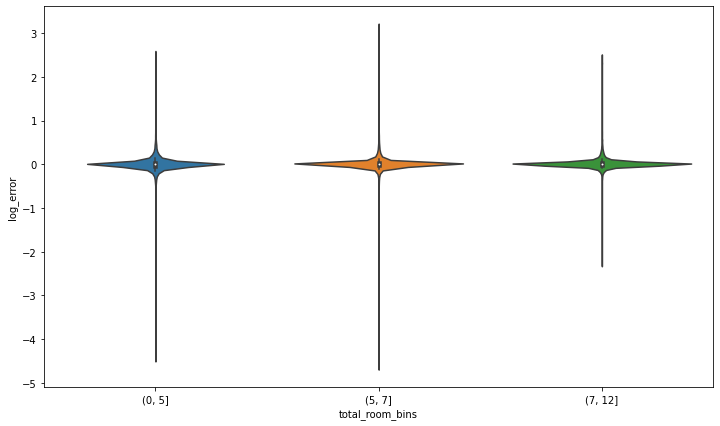

In [66]:
sns.violinplot(y=df.log_error, x=df.total_room_bins);

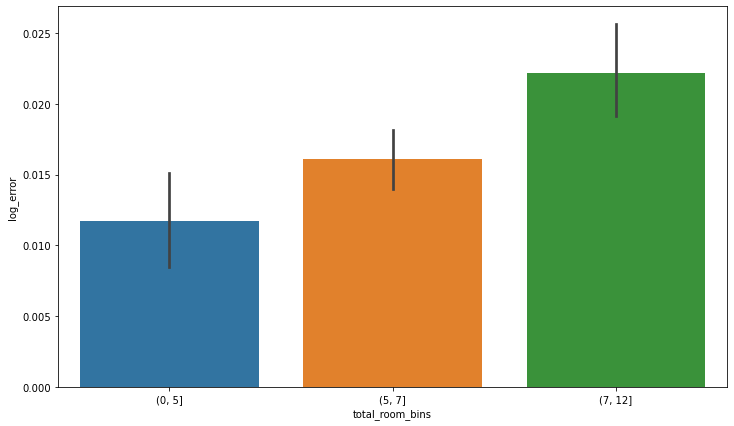

In [67]:
sns.barplot(x=df.total_room_bins, y=df.log_error);

In [68]:
# two sample t test for each combo
stats.ttest_ind(df.log_error[df.total_rooms <= 5], df.log_error[(df.total_rooms > 5) & (df.total_rooms <= 7 )], alternative='two-sided')

Ttest_indResult(statistic=-2.24250578518093, pvalue=0.02493534735150978)

In [69]:
stats.ttest_ind(df.log_error[df.total_rooms <= 5], df.log_error[df.total_rooms > 7], alternative='two-sided')

Ttest_indResult(statistic=-4.3048850278938025, pvalue=1.6789839469918815e-05)

In [70]:
stats.ttest_ind(df.log_error[(df.total_rooms > 5) & (df.total_rooms <= 7 )], df.log_error[df.total_rooms > 7], alternative='two-sided')

Ttest_indResult(statistic=-3.0797038664699, pvalue=0.002073934876531301)

***Conclusion:***
- Different mean log error for all

In [71]:
# one sample t test for each group
stats.ttest_1samp(df.log_error[df.total_rooms <= 5], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-2.5599230433265925, pvalue=0.01048275334969942)

In [72]:
stats.ttest_1samp(df.log_error[(df.total_rooms > 5) & (df.total_rooms <= 7 )], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=-0.06616315512732271, pvalue=0.9472485366888348)

In [73]:
stats.ttest_1samp(df.log_error[df.total_rooms > 7], df.log_error.mean(), alternative='two-sided')

Ttest_1sampResult(statistic=3.743214540708324, pvalue=0.0001829194190544729)

***Conclusion:***
- Mean log error for 0-5 and 7+ is different from pop mean
- Mean log error for 5 - 7 is not different from pop mean

**Appraised value exploration questions:**

1. Are properties with central heating worth more than those with other types?
    - Does this vary by county?
3. Is zip code related to assessed value?
4. Does lot size increase assessed value for similar sized houses (sqft)?
    - Bin houses by sf and compare to lot size
6. How are latitude and longitude related to assessed value?
5. Is total rooms more correlated than beds or baths to assessed value?

## Bonus

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [74]:
unique_zips = df.zip.unique().tolist()

In [75]:
sig_dif = []
for zip in unique_zips:
    t, p = stats.ttest_1samp(df[df.zip == zip].log_error, df.log_error.mean(), alternative='two-sided')
    if p < 0.05:
        sig_dif.append(zip)
print(sig_dif)

[96374, 96237, 96998, 96464, 96517, 96507, 96049, 97068, 95984, 96280, 96020, 96137, 96197, 96228, 97116, 96134, 96492, 96171, 96497, 96047, 96022, 96019, 96508, 96124, 96012, 96026, 96045, 96217, 96244, 95989, 96326, 96395, 96946, 96152, 96282, 96465, 96216, 96190, 96007, 96246, 96043, 96050, 96294, 96116, 96097, 96271, 96951, 96005]


## Extra Practice

In [76]:
df['abs_log_error'] = df.log_error.apply(lambda x: x if x >= 0 else -x)

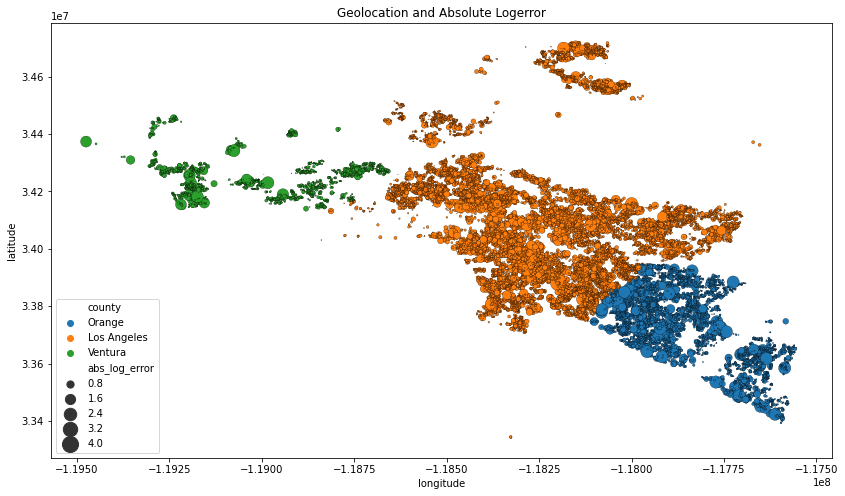

In [77]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_log_error', sizes=(0,300), ec='black', linewidth=0.25, data=df)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41062 entries, 0 to 77380
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sale_date            41062 non-null  object  
 1   bath_cnt             41062 non-null  float64 
 2   bed_cnt              41062 non-null  int64   
 3   sqft                 41062 non-null  int64   
 4   latitude             41062 non-null  int64   
 5   longitude            41062 non-null  int64   
 6   lot_sqft             41062 non-null  int64   
 7   land_use_code        41062 non-null  object  
 8   zoning_desc          41062 non-null  object  
 9   total_rooms          41062 non-null  int64   
 10  year_built           41062 non-null  int64   
 11  assessed_value       41062 non-null  float64 
 12  census_tract_block   41062 non-null  object  
 13  log_error            41062 non-null  float64 
 14  heating_system       41062 non-null  object  
 15  land_use           